**Title:** Youtube Trending Videos Analytics Project\
Welcome to my YouTube Analytics Project! This notebook will set out to create a model that best predicts the number of days a video will be trending for.

We create the model by:
1) Conducting Data Manipulation - Create new variables and columns which hold valuable values to use in future calculations \
2) Exploratory Data Analysis - Explore each variable and see what sort of trends we can spot through visualizations and graphs \
3) Supervised Model - Set out to predict the number of days trending (days_trending) using the values and information we derived from the previous steps! We try several models and list out their capabilities 

Enjoy!


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import io
import seaborn as sns
import datetime

In [41]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [42]:
import nltk
nltk.download ('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
# Sentiment analysis
# import VADER Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an instance
vds=SentimentIntensityAnalyzer()

In [44]:
#MUST DOWNLOAD CSV DATAFILE included in the zip folder
data = pd.read_csv('CA_youtube_trending_data.csv')

In [45]:
# displaying the data
display(data)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,XLr-ljPTfFs,Keith Eats Everything At Subway,2021-03-27T15:00:17Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys,23,2021-04-03T00:00:00Z,try guys|keith|ned|zach|eugene|habersberger|fu...,1857018,62192,1204,4935,https://i.ytimg.com/vi/XLr-ljPTfFs/default.jpg,False,False,Who's ready to eat fresh?! Watch Keith eat eve...
46140,bbUt3u7t4y4,Testing the viral apple juice that sounds like...,2021-03-05T20:14:46Z,UCsmvyN1ioujLMALHNKVnsSA,Ariana Lee,26,2021-04-03T00:00:00Z,[None],3694871,210607,30823,8782,https://i.ytimg.com/vi/bbUt3u7t4y4/default.jpg,False,False,Testing the viral apple juice that sounds like...
46141,ZqxQ7MBfwyo,We Finally Take The Corvair Off Road.,2021-03-28T13:15:03Z,UCwdVOry0oNF9WIe_3uCfz9Q,Matt's Off Road Recovery,2,2021-04-03T00:00:00Z,Off road recovery|Rescue|Matts off road recove...,728146,31497,260,3004,https://i.ytimg.com/vi/ZqxQ7MBfwyo/default.jpg,False,False,So we're building a Corvair rescue truck and w...
46142,FmZS9j54okg,Daniel Cormier reacts to Francis Ngannou's KO ...,2021-03-28T05:47:27Z,UCiWLfSweyRNmLpgEHekhoAg,ESPN,17,2021-04-03T00:00:00Z,espn|#espn|francis ngannou|stipe miocic vs fra...,1614174,16754,683,3269,https://i.ytimg.com/vi/FmZS9j54okg/default.jpg,False,False,Former UFC heavyweight champion Daniel Cormier...


In [46]:
#Count the number of values within the data set
data['video_id'].count()

46144

In [47]:
#Count the number of unique values within the data set
data['video_id'].nunique()

8732

**DATA MANIPULATION: ADDING DESIRED COLUMNS TO DATA**

In [48]:
#Create dataframe
df = pd.DataFrame(data)

In [49]:
#Adding new columns to dataframe

#Engagement ratio percent
df['likes_percentage'] = df['likes'].divide(df[['likes', 'dislikes']].sum(axis=1))
df['likes_percentage'] = df['likes_percentage'].fillna(0)

#Number of tags column
df['tag_num'] = df['tags'].apply(lambda x: len(x.split('|')) if x != '[none]' else 0)

#Number of uppercase words in title column (code still works despite warning. Please disregard it.)
df['uppercase_words'] = ""
for i in range(0,46144):
  df['uppercase_words'][i] = sum(map(str.isupper, df['title'][i].split()))
df['uppercase_words'] = df['uppercase_words'].astype(str).astype(int)

#title sentiment analysis column
df['title_sentiment'] = [vds.polarity_scores(x)['compound'] for x in df['title']]

#title length column
df['title_length'] = df["title"].apply(lambda x: len(x))

#ADDING DAYS VIDEO IS TRENDING COLUMN
df['days_trending'] = df.groupby(['video_id'])['title'].transform('count')

#ADDING DAYS UNTIL VIDEO IS TRENDING COLUMN
#df['days_to_get_trending']=df.groupby('video_id')['trending_date','publishedAt'].transform('count')
df['trending_date'] = data['trending_date'].str.slice(0,10,1)
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = data['publishedAt'].str.slice(0,10,1)
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

df['days_until_first_trending'] = df['trending_date'].sub(df['publishedAt'], axis=0)
df['days_until_first_trending'] = df['days_until_first_trending'].dt.days
df['days_until_first_trending'] = df['days_until_first_trending'].astype(int)
df['days_until_first_trending'] = df.groupby(['video_id'])['days_until_first_trending'].transform('min')

#display newly formated data
display(df)

<ipython-input-49-d90c853edc8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uppercase_words'][i] = sum(map(str.isupper, df['title'][i].split()))


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,likes_percentage,tag_num,uppercase_words,title_sentiment,title_length,days_trending,days_until_first_trending
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,...,False,False,CLASH official music video performed by DILJIT...,0.979585,23,2,0.0000,55,6,1
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,...,False,False,I left youtube for a month and this is what ha...,0.992627,30,2,0.0000,53,6,1
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,...,False,False,"While running her own modding shop, Ramya Pare...",0.981315,25,0,0.0000,60,4,1
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0.964017,15,7,0.0000,34,6,1
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,...,False,False,Transforming The LaBrant Family's empty white ...,0.979387,33,1,0.0000,55,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,XLr-ljPTfFs,Keith Eats Everything At Subway,2021-03-27,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys,23,2021-04-03,try guys|keith|ned|zach|eugene|habersberger|fu...,1857018,62192,...,False,False,Who's ready to eat fresh?! Watch Keith eat eve...,0.981008,35,0,0.0000,31,7,1
46140,bbUt3u7t4y4,Testing the viral apple juice that sounds like...,2021-03-05,UCsmvyN1ioujLMALHNKVnsSA,Ariana Lee,26,2021-04-03,[None],3694871,210607,...,False,False,Testing the viral apple juice that sounds like...,0.872332,1,0,0.4199,64,7,23
46141,ZqxQ7MBfwyo,We Finally Take The Corvair Off Road.,2021-03-28,UCwdVOry0oNF9WIe_3uCfz9Q,Matt's Off Road Recovery,2,2021-04-03,Off road recovery|Rescue|Matts off road recove...,728146,31497,...,False,False,So we're building a Corvair rescue truck and w...,0.991813,34,0,0.0000,37,6,1
46142,FmZS9j54okg,Daniel Cormier reacts to Francis Ngannou's KO ...,2021-03-28,UCiWLfSweyRNmLpgEHekhoAg,ESPN,17,2021-04-03,espn|#espn|francis ngannou|stipe miocic vs fra...,1614174,16754,...,False,False,Former UFC heavyweight champion Daniel Cormier...,0.960830,28,2,0.0000,87,6,1


In [50]:
#Droping duplicate entries
unique_df = df.drop_duplicates(subset=['video_id'], keep = "first")

In [51]:
#Get the top number of days on trending
days_trending_df = df.sort_values(by = [ 'view_count' ], ascending = False).drop_duplicates(subset=['video_id'])
days_trending_df = days_trending_df.sort_values(by = ['days_trending'], ascending = False)
display(days_trending_df[['video_id', 'title', 'days_trending']])

,video_id,title,days_trending
28194,Bbyftsl7Owo,Best Friends Buy Each Other Christmas Gifts!,11
28196,I9RC_DANDAM,Best Friends Play White Elephant | Dixie D'Amelio,11
37942,aXzVF3XeS8M,Taylor Swift - Love Story (Taylor’s Version) [...,10
44932,tQ0yjYUFKAE,"Justin Bieber - Peaches ft. Daniel Caesar, Giveon",10
28189,1iqpSrNVjYQ,Did Dream Fake His Speedrun - RESPONSE,10
...,...,...,...
7428,hZxrSnh0ThE,HEAT at CELTICS | FULL GAME HIGHLIGHTS | Septe...,1
182,D-ocerKPufk,The Kid LAROI - SELFISH (Official Video),1
45963,QwSzgVycmNw,"What's closing, remaining open during Ontario'...",1
177,KKPDREbthbs,Sancho Dortmund Transfer Update! Man Utd Trans...,1


### **Exploratory Data Analysis**

In [52]:
%matplotlib inline
# Parameters for figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [53]:
#summary stats
unique_df.describe()

,categoryId,view_count,likes,dislikes,comment_count,likes_percentage,tag_num,uppercase_words,title_sentiment,title_length,days_trending,days_until_first_trending
count,8732.000000,8.732000e+03,8.732000e+03,8732.000000,8.732000e+03,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,19.158956,1.222552e+06,9.537696e+04,1612.168919,9.424114e+03,0.962938,17.494388,1.394411,0.022868,51.456024,5.284471,1.380554
std,6.881487,2.476443e+06,2.483660e+05,7402.441663,5.507186e+04,0.101228,12.441607,2.062744,0.309739,20.699264,1.578307,1.481935
min,1.000000,1.581900e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,-0.930000,2.000000,1.000000,0.000000
25%,17.000000,2.883265e+05,1.277325e+04,204.000000,1.143000e+03,0.971039,7.000000,0.000000,0.000000,37.000000,4.000000,1.000000
50%,22.000000,5.776170e+05,3.400750e+04,491.500000,2.745000e+03,0.985220,17.000000,1.000000,0.000000,49.000000,5.000000,1.000000
75%,24.000000,1.234649e+06,8.410900e+04,1265.000000,6.754750e+03,0.992003,26.000000,2.000000,0.000000,64.000000,6.000000,2.000000
max,29.000000,7.680503e+07,7.046462e+06,405397.000000,2.308306e+06,1.000000,79.000000,18.000000,0.932500,100.000000,11.000000,31.000000


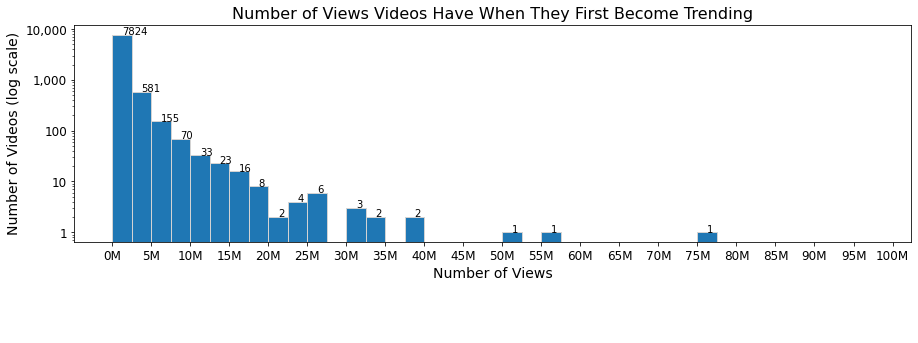

In [54]:
#How many views a video has when it first becomes trending
bin_list = []
for x in range(0,100000000,2500000):
  bin_list.append(x)

ax = unique_df['view_count'].plot.hist(figsize=(15,4), bins=bin_list, log=True, lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.set_xlabel('Number of Views', axes=ax)
ax.set_ylabel('Number of Videos (log scale)', axes=ax)
ax.set_title('Number of Views Videos Have When They First Become Trending',fontsize=16)

x_offset = 0.01
y_offset = 0.01
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.show()

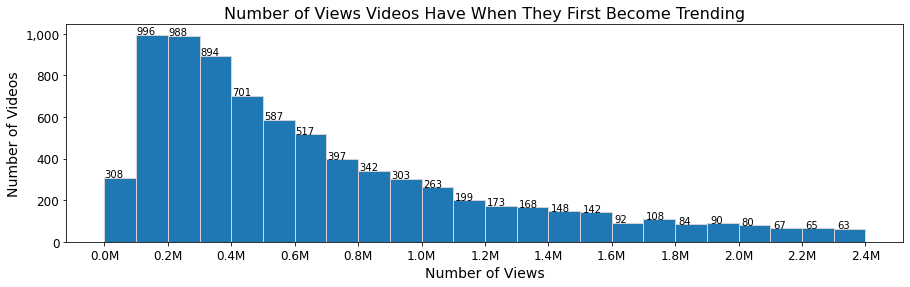

In [55]:
#How many views a video has when it first becomes trending (ZOOMED IN)
bin_list2 = []
for x in range(0,2500000,100000):
  bin_list2.append(x)

ax = unique_df['view_count'].plot.hist(figsize=(15,4), bins=bin_list2, log=False, lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
def millions(x, pos):
    return '{:.1f}M'.format(float(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.set_xlabel('Number of Views', axes=ax)
ax.set_ylabel('Number of Videos', axes=ax)
ax.set_title('Number of Views Videos Have When They First Become Trending',fontsize=16)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=10)
    
plt.show()

/Users/Admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


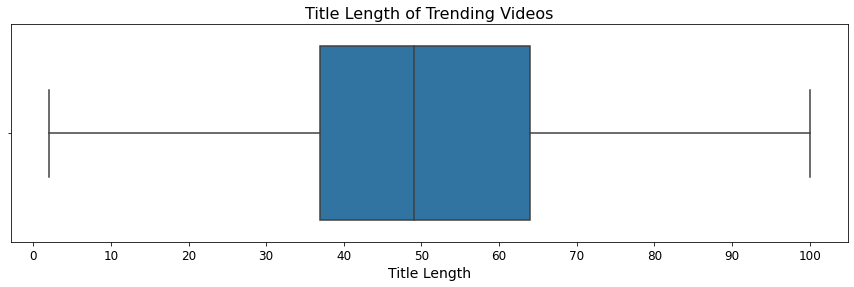

In [56]:
#title length distribution
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot(unique_df['title_length'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title('Title Length of Trending Videos',fontsize=16)
ax.set_xlabel('Title Length')

plt.show()

Overall average title length = 51.4560238204306


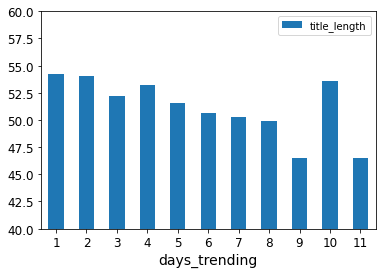

In [57]:
#Days trending vs average title length
avg_title_length = unique_df.groupby('days_trending', as_index=False)['title_length'].mean()
avg_title_length.plot.bar(x = 'days_trending', y = 'title_length', rot=0)
plt.ylim([40,60])

overall_ts_avg = unique_df['title_length'].mean()
print('Overall average title length =', overall_ts_avg)

Overall average title sentiment = 0.022868483737975412


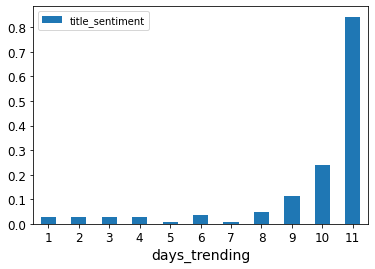

In [58]:
#Days trending vs average title sentiment
avg_ts = unique_df.groupby('days_trending', as_index=False)['title_sentiment'].mean()
avg_ts.plot.bar(x = 'days_trending', y = 'title_sentiment', rot=0)

overall_ts_avg = unique_df['title_sentiment'].mean()
print('Overall average title sentiment =', overall_ts_avg)

Overall average number of tags = 17.494388456252864


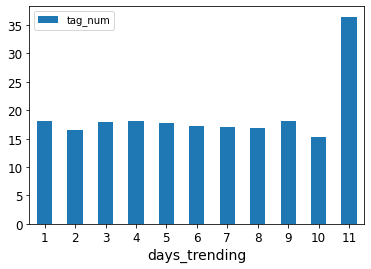

In [59]:
#Days trending vs average number of tags used
avg_tags = unique_df.groupby('days_trending', as_index=False)['tag_num'].mean()
avg_tags.plot.bar(x = 'days_trending', y = 'tag_num', rot=0)

overall_tags_avg = unique_df['tag_num'].mean()
print('Overall average number of tags =', overall_tags_avg)

Overall average number of uppercase words in title = 1.3944113605130555


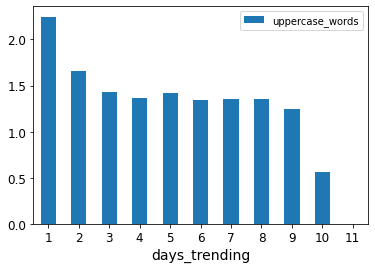

In [60]:
#Days trending vs number of uppercase words in title
avg_uw = unique_df.groupby('days_trending', as_index=False)['uppercase_words'].mean()
avg_uw.plot.bar(x = 'days_trending', y = 'uppercase_words', rot=0)

overall_uw_avg = unique_df['uppercase_words'].mean()
print('Overall average number of uppercase words in title =', overall_uw_avg)

Overall average number of days until a video that trends becomes trending = 1.380554283096656


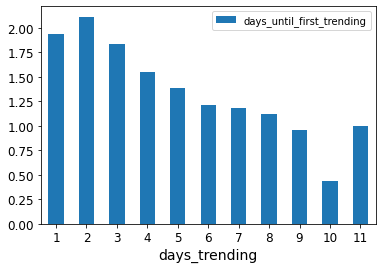

In [61]:
#days until video becomes trending vs how long video trends for
avg_dt = unique_df.groupby('days_trending', as_index=False)['days_until_first_trending'].mean()
avg_dt.plot.bar(x = 'days_trending', y = 'days_until_first_trending', rot=0)

overall_dt_avg = unique_df['days_until_first_trending'].mean()
print('Overall average number of days until a video that trends becomes trending =', overall_dt_avg)

### **Supervised Models**

In [62]:
# Drop all categorical variables
dropped_df = unique_df.drop(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'trending_date', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'categoryId'], axis=1)

In [63]:
display(dropped_df)

,view_count,likes,dislikes,comment_count,likes_percentage,tag_num,uppercase_words,title_sentiment,title_length,days_trending,days_until_first_trending
0,9140911,296541,6180,30059,0.979585,23,2,0.0000,55,6,1
1,2038853,353797,2628,40222,0.992627,30,2,0.0000,53,6,1
2,2381688,146740,2794,16549,0.981315,25,0,0.0000,60,4,1
3,1514614,156914,5857,35331,0.964017,15,7,0.0000,34,6,1
4,1123889,45803,964,2198,0.979387,33,1,0.0000,55,6,1
...,...,...,...,...,...,...,...,...,...,...,...
45969,179438,18177,132,3587,0.992790,26,7,0.0000,52,1,1
45971,1995869,111108,1407,674,0.987495,1,9,0.3254,47,1,4
45973,315307,19249,291,3951,0.985107,11,1,0.6124,59,1,1
45980,795206,48662,467,3317,0.990494,29,0,0.0772,56,1,1


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
#split into target and features, which is days_trending here
y_val = dropped_df.loc[:, ['days_trending']]
X_val = dropped_df.drop(columns=['days_trending'])

In [66]:
# Set randomness so that we all get the same answer
np.random.seed(25)

# Split the data into train and test pieces for both X and Y
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, train_size=0.80)

In [67]:
def compute_mape_score(y_test_input, y_pred_input):
    y_test_input = np.array(y_test_input).reshape(-1,)
    y_pred_input = np.array(y_pred_input).reshape(-1,)
    percent_errors = np.abs((y_test_input - y_pred_input) / y_test_input) * 100
    return np.mean(np.array(percent_errors))

Support Vector Regressor Model

In [68]:
# Support Vector Regressor Modelling
svm_model = svm.SVR()
svm_fit = svm_model.fit(X_train, y_train.values.ravel())

# get model prediction
y_pred_svm = svm_fit.predict(X_test)

In [69]:
#Print out metrics value for the svm
mae_svm = metrics.mean_absolute_error(y_test, y_pred_svm)
mape_svm = compute_mape_score(y_test, y_pred_svm)
overall_accuracy_svm = 100 - mape_svm

print('Mean Absolute Error:', mae_svm)
print('Mean Absolute Percentage Error:', mape_svm) 
print('Overall accuracy:', overall_accuracy_svm, '%')

Mean Absolute Error: 1.1880349819101834
Mean Absolute Percentage Error: 32.9268469376983
Overall accuracy: 67.0731530623017 %


Gradient Boosting Regressor Model

In [70]:
#Gradient Boosting Regressor Model
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train.values.ravel())
y_pred_gbr = gbrt.predict(X_test)

In [71]:
#Print out metrics value for the Gradient Boosting Regressor
mae_gbr = metrics.mean_absolute_error(y_test, y_pred_gbr)
mape_gbr = compute_mape_score(y_test, y_pred_gbr)
overall_accuracy_gbr = 100 - mape_gbr

print('Mean Absolute Error:', mae_gbr)
print('Mean Absolute Percentage Error:', mape_gbr) 
print('Overall accuracy:', overall_accuracy_gbr, '%')

Mean Absolute Error: 1.1111969430240591
Mean Absolute Percentage Error: 29.46917836054348
Overall accuracy: 70.53082163945652 %


Random Forest Regressor

In [72]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 17).fit(X_train,y_train.values.ravel())
y_pred_rfr = regressor.predict(X_test)

In [73]:
#Print out metrics value for the random forest regressor
mae_rfr = metrics.mean_absolute_error(y_test, y_pred_rfr)
mape_rfr = compute_mape_score(y_test, y_pred_rfr)
overall_accuracy_rfr = 100 - mape_rfr

print('Mean Absolute Error:', mae_rfr)
print('Mean Absolute Percentage Error:', mape_rfr)
print('Overall accuracy:', overall_accuracy_rfr, '%')

Mean Absolute Error: 1.1123010875787065
Mean Absolute Percentage Error: 28.57132635538474
Overall accuracy: 71.42867364461526 %


In [74]:
#feature importance for RFR
feature_imp_rfr = pd.Series(regressor.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp_rfr

likes                        0.156369
view_count                   0.136151
comment_count                0.121679
likes_percentage             0.104217
title_length                 0.098988
days_until_first_trending    0.097575
dislikes                     0.094360
tag_num                      0.088648
title_sentiment              0.057237
uppercase_words              0.044777
dtype: float64

Stacking Models

In [75]:
#RandomForestRegressor Model
rfr_pred_train = regressor.predict(X_train) #predicting against own training data

#GradientBoostingRegressor Model
gbr_pred_train = gbrt.predict(X_train) #predicting against own training data

In [76]:
#Combining set of predictions into a new set (X_train_pred)
X_train_pred = zip(gbr_pred_train,rfr_pred_train)
X_train_pred = pd.DataFrame(X_train_pred)

#training new blender_model (RandomForestRegressor) on X_train_pred and y_train
blender_model = RandomForestRegressor(random_state=17)
blender_model.fit(X_train_pred, y_train.values.ravel())

#stacking base models (RFR and GBR) X_test predictions
X_test_pred = zip(y_pred_gbr,y_pred_rfr)
X_test_pred = pd.DataFrame(X_test_pred)

#predicting X_test with new blender model and compare the accuracy against y_test
blender_pred = blender_model.predict(X_test_pred)

In [77]:
#Print out metrics value for the random forest regressor
mae_blend = metrics.mean_absolute_error(y_test, blender_pred)
mape_blend = compute_mape_score(y_test, blender_pred)
overall_accuracy_blend = 100 - mape_blend

print('Mean Absolute Error:', mae_blend)
print('Mean Absolute Percentage Error:', mape_blend) 
print('Overall accuracy:', overall_accuracy_blend, '%')

Mean Absolute Error: 1.1310761305094448
Mean Absolute Percentage Error: 28.494725197844833
Overall accuracy: 71.50527480215517 %


In [78]:
#Display all model performance 
results = {'MAE' : [mae_svm, mae_gbr, mae_rfr, mae_blend], 
           'MAPE' : [mape_svm, mape_gbr, mape_rfr, mape_blend], 
           'Overall Accuracy' : [overall_accuracy_svm, overall_accuracy_gbr, 
                                 overall_accuracy_rfr, overall_accuracy_blend]}
results_df = pd.DataFrame(results, columns = ['MAE', 'MAPE', 'Overall Accuracy'], 
                          index = ['SVR', 'Gradient Boosting Regressor', 
                                   'Random Forest Regressor', 'Blended Model'])
print(results_df)

                                  MAE       MAPE  Overall Accuracy
SVR                          1.188035  32.926847         67.073153
Gradient Boosting Regressor  1.111197  29.469178         70.530822
Random Forest Regressor      1.112301  28.571326         71.428674
Blended Model                1.131076  28.494725         71.505275
